In [13]:
import numpy as np

shots = 30    # 총기 발사 횟수(30발) 
a = 1.2       # 수직 반동 세기
b = 0.1      # 수평 반동 세기

t = np.arange(1, shots+1)

In [14]:
y = a * np.log(t+1)
x = b * np.sin(0.1 * t) + np.random.normal(0, 0.2, shots)

In [15]:
x_cum = np.cumsum(x)
y_cum = np.cumsum(y)

Text(0, 0.5, '수직')

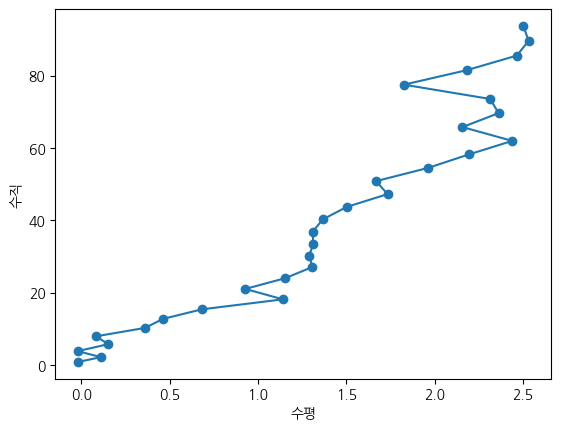

In [17]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot(x_cum, y_cum, marker='o')
plt.xlabel("수평")
plt.ylabel("수직")

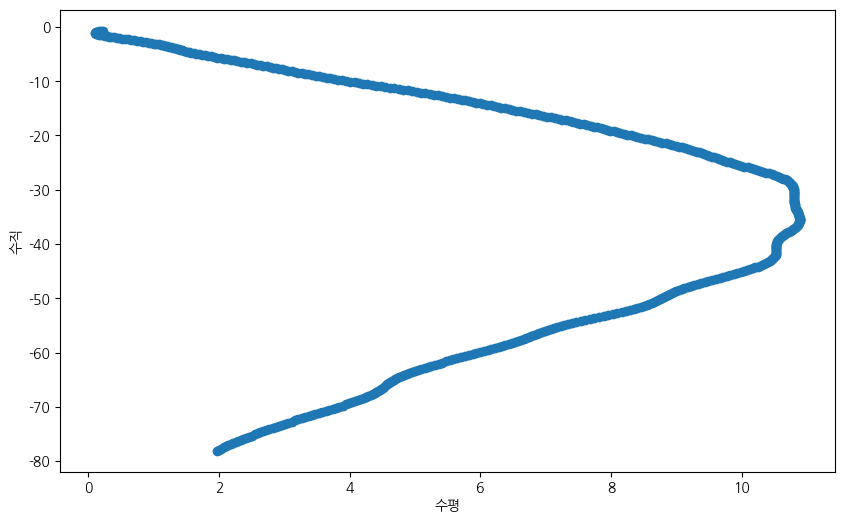

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

# 샘플 궤적 데이터 생성 (예: 기존 총기 반동 누적값)
shots = 30
t = np.arange(1, shots + 1)
a, b = 1, 1
y = a * np.log(t + 1)
x = b * np.sin(0.187 * t) + np.random.normal(0, 0.2, shots)

x_cum = np.cumsum(x)
y_cum = np.cumsum(y)

# 보간용 곡선 생성
t_new = np.linspace(1, shots, 500)  # 더 많은 포인트로 부드럽게

# Cubic Spline 보간
spl_x = splrep(t, x_cum, s=0)
spl_y = splrep(t, y_cum, s=0)

x_smooth = splev(t_new, spl_x)
y_smooth = splev(t_new, spl_y)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, -np.array(y_smooth), marker='o')  # 부드러운 곡선
plt.xlabel("수평")
plt.ylabel("수직")
plt.show()


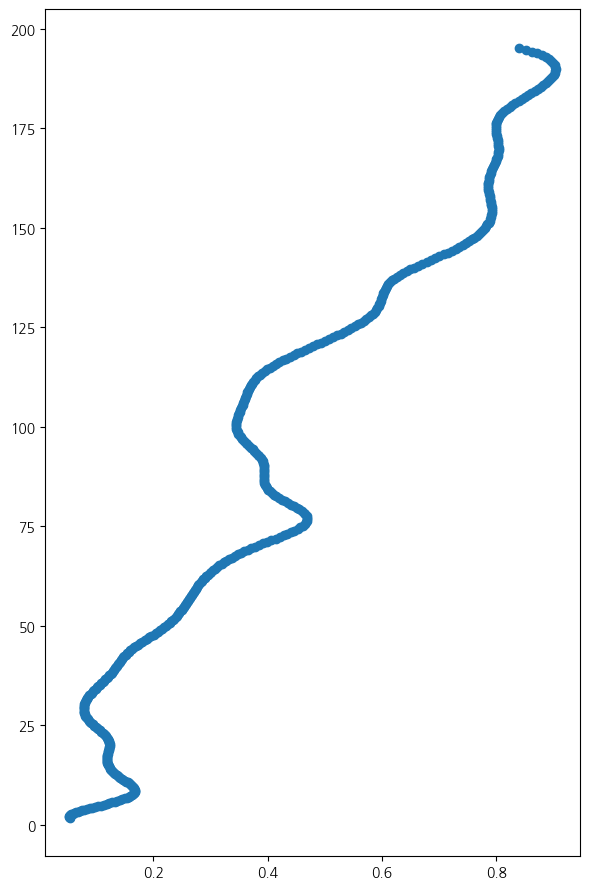

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

# 설정
shots = 30
a = 2.5
t = np.arange(1, shots + 1)

# 수직 반동: 점점 증가
y = a * np.log(t + 1)
y_cum = np.cumsum(y)

# 수평 반동: 고정값 or 거의 없는 난수
x = np.zeros_like(t) + np.random.normal(0.01, 0.05, shots)  # 지그재그 제거
x_cum = np.cumsum(x)

# 보간 처리
t_new = np.linspace(1, shots, 500)
spl_x = splrep(t, x_cum, s=0)
spl_y = splrep(t, y_cum, s=0)

x_smooth = splev(t_new, spl_x)
y_smooth = splev(t_new, spl_y)

# 시각화
plt.figure(figsize=(6, 9))
plt.plot(x_smooth, y_smooth, marker='o')  # y축 반전
plt.tight_layout()
plt.show()


## 데이터

In [51]:
import numpy as np
import json
from scipy.interpolate import splrep, splev

def generate_recoil_trajectory(shots=30, points=100):
    """
    곡선형 총기 반동 궤적 1개 생성
    :param shots: 발사 횟수 (원본 포인트 수)
    :param points: 곡선 보간 후 출력 좌표 수
    :return: (x_smooth, y_smooth) 튜플
    """
    t = np.arange(1, shots + 1)
    a = np.random.uniform(2.0, 3.0)  # 수직 반동 세기
    b = np.random.uniform(0.8, 1.5)  # 수평 반동 세기

    # 수직 반동: 점점 커지는 로그 형태
    y = a * np.log(t + 1)

    # 수평 반동: 사인 함수 + 약간의 노이즈
    x = b * np.sin(0.5 * t) + np.random.normal(0, 0.2, shots)

    # 누적 궤적 좌표 생성
    x_cum = np.cumsum(x)
    y_cum = np.cumsum(y)

    # 보간을 위한 새로운 시간 축
    t_new = np.linspace(1, shots, points)

    # Cubic Spline 보간 적용
    spl_x = splrep(t, x_cum, s=0)
    spl_y = splrep(t, y_cum, s=0)

    x_smooth = splev(t_new, spl_x)
    y_smooth = splev(t_new, spl_y)

    return x_smooth, y_smooth

# 전체 데이터셋 생성
recoil_dataset = []

for i in range(100):
    x, y = generate_recoil_trajectory()
    trajectory = [{"x": float(xi), "y": float(yi)} for xi, yi in zip(x, y)]
    recoil_dataset.append({
        "id": f"trajectory_{i+1}",
        "points": trajectory
    })

# JSON 파일로 저장
with open("data/recoil_dataset.json", "w", encoding="utf-8") as f:
    json.dump(recoil_dataset, f, indent=2, ensure_ascii=False)

print("✅ 'recoil_dataset.json' 파일로 저장 완료되었습니다.")


✅ 'recoil_dataset.json' 파일로 저장 완료되었습니다.
